In [85]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
import tkinter as tk 
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import statsmodels.api as sm


In [86]:
df = pd.read_csv('StudentsPerformance.csv')

In [87]:
print('The number of rows or students in the data are: ' +  str(df.shape[0]) + ".")
print('The number of columns in the data are: ' + str(df.shape[1]) + '.')

The number of rows or students in the data are: 1000.
The number of columns in the data are: 8.


In [88]:
print('Here is a look at the data:')
df.head()

Here is a look at the data:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [89]:
print("Here is a breakdown of the data with all selections: \n")

column_list = list(df.columns)
i = 0
for col in df:
    if (col == 'math score'):
        break
    category_string = column_list[i] + ":"
    options = df[col].unique()
    for item in options:
        if (item == options[-1]):
            category_string = category_string + " " + item + " "
        else:            
            category_string = category_string + " " + item + ","
    print(category_string + "\n")
    i = i + 1
for score in range(5,8):
    print(column_list[score] + ": Range 0-100" + "\n")

Here is a breakdown of the data with all selections: 

gender: female, male 

race/ethnicity: group B, group C, group A, group D, group E 

parental level of education: bachelor's degree, some college, master's degree, associate's degree, high school, some high school 

lunch: standard, free/reduced 

test preparation course: none, completed 

math score: Range 0-100

reading score: Range 0-100

writing score: Range 0-100



In [90]:
print("Here are some descriptive statistics about your students standardized test scores: ")
df.describe()

Here are some descriptive statistics about your students standardized test scores: 


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [91]:
print("Checking for missing data:")
columns = df.shape[0]
missing = df.isnull().sum()/columns
print(missing)

Checking for missing data:
gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [92]:
print('__________________K Means Clustering_________________________________')

__________________K Means Clustering_________________________________


[[47.1097561  50.98373984]
 [82.38110749 84.85016287]
 [65.34451902 68.40715884]]


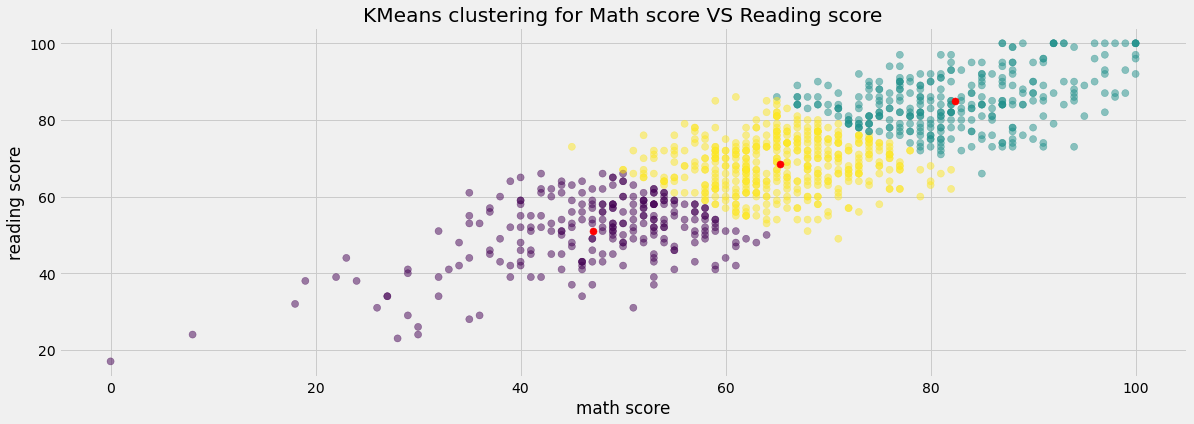

In [93]:
df_math_reading = DataFrame(df, columns=['math score', 'reading score'])
df_math_writing = DataFrame(df, columns=['math score', 'writing score'])
df_reading_writing = DataFrame(df, columns=['reading score', 'writing score'])

kmeans = KMeans(n_clusters=3).fit(df_math_reading)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['math score'], df['reading score'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('KMeans clustering for Math score VS Reading score')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

[[65.84599156 68.5021097 ]
 [83.49090909 84.68      ]
 [47.48207171 48.99203187]]


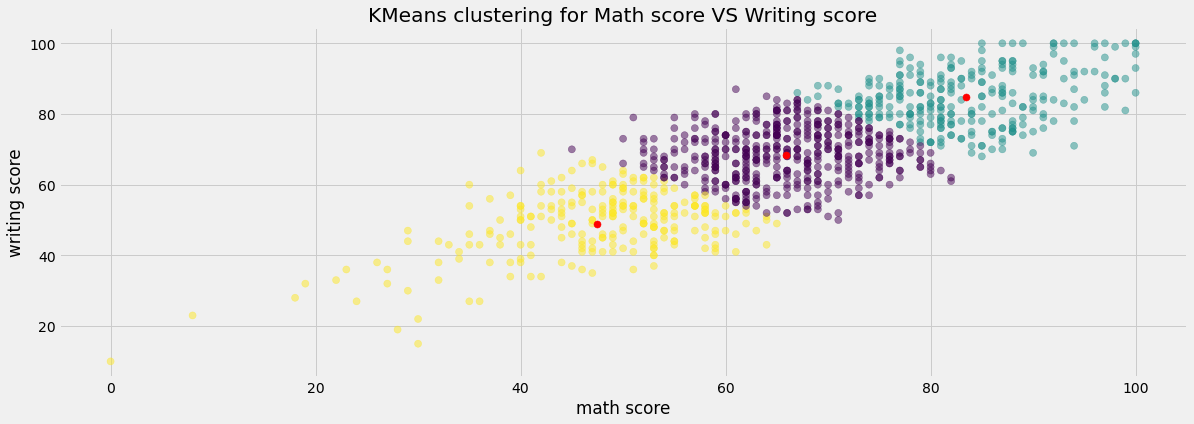

In [94]:
kmeans = KMeans(n_clusters=3).fit(df_math_writing)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df_math_writing['math score'], df['writing score'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('KMeans clustering for Math score VS Writing score')
plt.xlabel('math score')
plt.ylabel('writing score')
plt.show()

[[72.97777778 72.31111111]
 [44.36363636 42.03305785]
 [59.74035088 58.22105263]
 [87.61965812 86.93589744]]


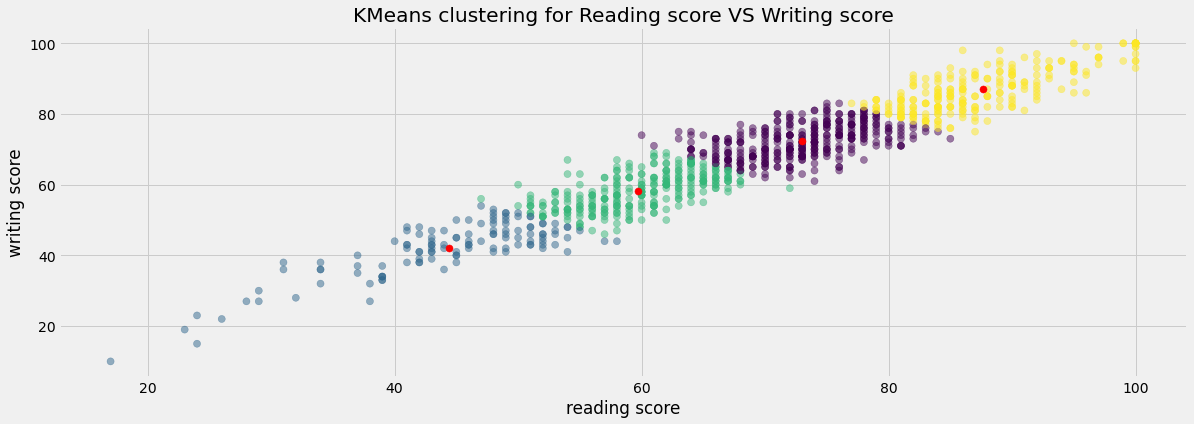

In [95]:
kmeans = KMeans(n_clusters=4).fit(df_reading_writing)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['reading score'], df['writing score'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('KMeans clustering for Reading score VS Writing score')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.show()

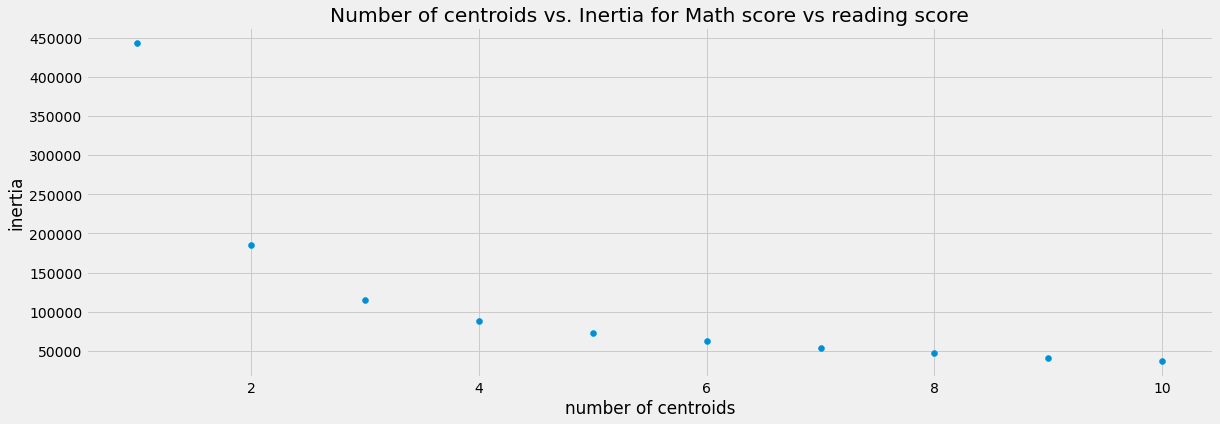

In [99]:
df_math_reading = DataFrame(df, columns=['math score', 'reading score'])
kmeans1 = KMeans(n_clusters=1).fit(df_math_reading)
kmeans2 = KMeans(n_clusters=2).fit(df_math_reading)
kmeans3 = KMeans(n_clusters=3).fit(df_math_reading)
kmeans4 = KMeans(n_clusters=4).fit(df_math_reading)
kmeans5 = KMeans(n_clusters=5).fit(df_math_reading)
kmeans6 = KMeans(n_clusters=6).fit(df_math_reading)
kmeans7 = KMeans(n_clusters=7).fit(df_math_reading)
kmeans8 = KMeans(n_clusters=8).fit(df_math_reading)
kmeans9 = KMeans(n_clusters=9).fit(df_math_reading)
kmeans10 = KMeans(n_clusters=10).fit(df_math_reading)

KMeans_inertia = {
    'centroids': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'inertia': [kmeans1.inertia_, kmeans2.inertia_, kmeans3.inertia_, kmeans4.inertia_, kmeans5.inertia_, kmeans6.inertia_,
               kmeans7.inertia_, kmeans8.inertia_,kmeans9.inertia_, kmeans10.inertia_]
}

kmeans_i_df = pd.DataFrame(KMeans_inertia, columns=['centroids', 'inertia'])
plt.title('Number of centroids vs. Inertia for Math score vs reading score')
plt.xlabel('number of centroids')
plt.ylabel('inertia')
plt.scatter(kmeans_i_df['centroids'], kmeans_i_df['inertia'])


In [100]:
print('Three centroids was determined to be the best fit by graph above.')

Three centroids was determined to be the best fit by graph above.


[[ 1.95188285 65.89748954]
 [ 2.44525547 84.2189781 ]
 [ 1.92741935 46.42741935]]


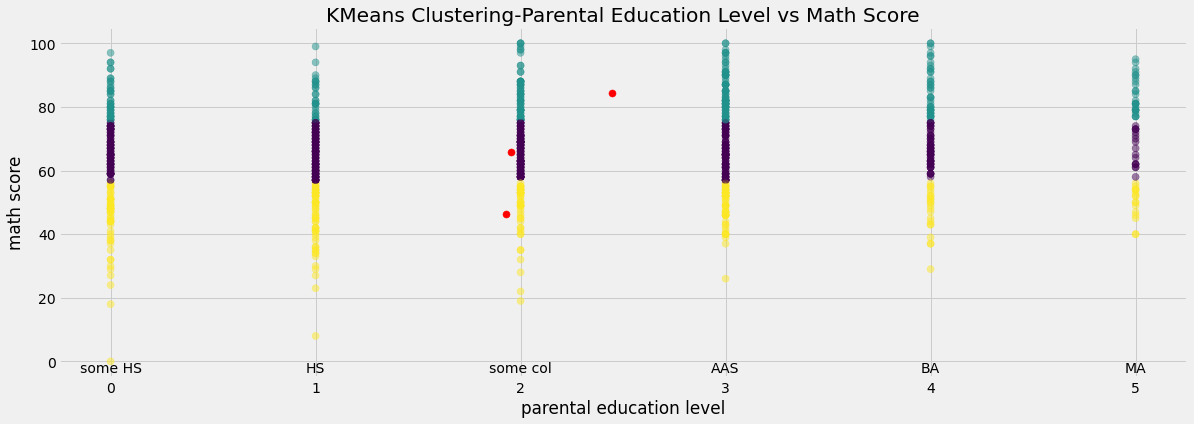

In [103]:
df['parental level of education'] = df['parental level of education'].astype(pd.api.types.CategoricalDtype(
    categories=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree",  
                "master's degree"], ordered=True))
df['parental level of education-codes'] = df['parental level of education'].cat.codes
df_parent_education_math = DataFrame(df, columns=['parental level of education-codes', 'math score'])
df_parent_education_read = DataFrame(df, columns=['parental level of education-codes', 'reading score'])
df_parent_education_writing = DataFrame(df, columns=['parental level of education-codes', 'writing score'])
kmeans = KMeans(n_clusters=3).fit(df_parent_education_math)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['parental level of education-codes'], df['math score'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('KMeans Clustering-Parental Education Level vs Math Score')
plt.xlabel('parental education level')
plt.ylabel('math score')
plt.text(0, 0, 'some HS', horizontalalignment='center', verticalalignment='top')
plt.text(1, 0, 'HS', horizontalalignment='center', verticalalignment='top')
plt.text(2, 0, 'some col', horizontalalignment='center', verticalalignment='top')
plt.text(3, 0, 'AAS', horizontalalignment='center', verticalalignment='top')
plt.text(4, 0, 'BA', horizontalalignment='center', verticalalignment='top')
plt.text(5, 0, 'MA', horizontalalignment='center', verticalalignment='top')
plt.show()

[[ 1.76377953 50.29133858]
 [ 2.34796238 85.27586207]
 [ 2.07025761 68.36533958]]


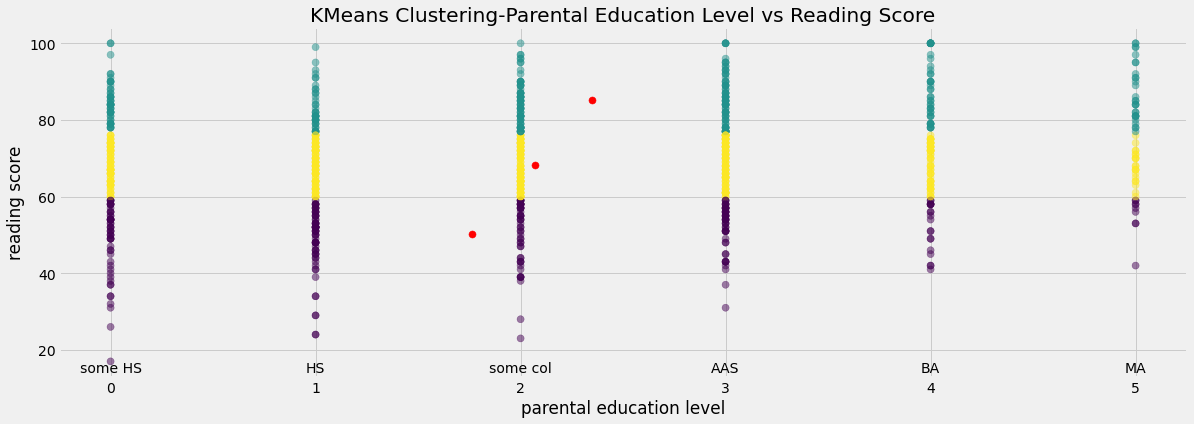

In [104]:
kmeans = KMeans(n_clusters=3).fit(df_parent_education_read)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['parental level of education-codes'], df['reading score'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('KMeans Clustering-Parental Education Level vs Reading Score')
plt.xlabel('parental education level')
plt.ylabel('reading score')
plt.text(0, 17, 'some HS', horizontalalignment='center', verticalalignment='top')
plt.text(1, 17, 'HS', horizontalalignment='center', verticalalignment='top')
plt.text(2, 17, 'some col', horizontalalignment='center', verticalalignment='top')
plt.text(3, 17, 'AAS', horizontalalignment='center', verticalalignment='top')
plt.text(4, 17, 'BA', horizontalalignment='center', verticalalignment='top')
plt.text(5, 17, 'MA', horizontalalignment='center', verticalalignment='top')
plt.show()

[[ 2.38613861 85.0990099 ]
 [ 1.72014925 48.64925373]
 [ 2.09090909 68.13752914]]


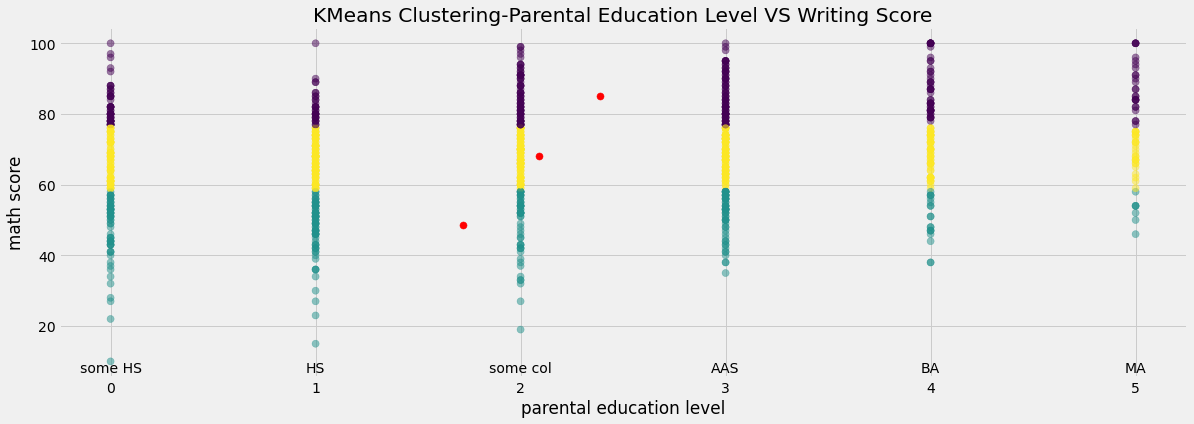

In [105]:
kmeans = KMeans(n_clusters=3).fit(df_parent_education_writing)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['parental level of education-codes'], df['writing score'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('KMeans Clustering-Parental Education Level VS Writing Score')
plt.xlabel('parental education level')
plt.ylabel('math score')
plt.text(0, 10, 'some HS', horizontalalignment='center', verticalalignment='top')
plt.text(1, 10, 'HS', horizontalalignment='center', verticalalignment='top')
plt.text(2, 10, 'some col', horizontalalignment='center', verticalalignment='top')
plt.text(3, 10, 'AAS', horizontalalignment='center', verticalalignment='top')
plt.text(4, 10, 'BA', horizontalalignment='center', verticalalignment='top')
plt.text(5, 10, 'MA', horizontalalignment='center', verticalalignment='top')
plt.show()

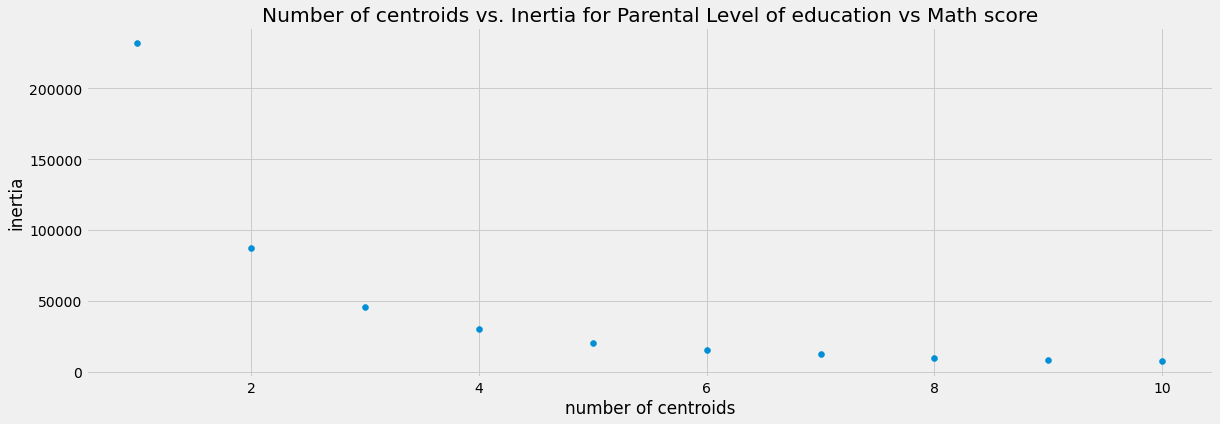

In [101]:
df['parental level of education'] = df['parental level of education'].astype(pd.api.types.CategoricalDtype(
    categories=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree",  
                "master's degree"], ordered=True))
df['parental level of education-codes'] = df['parental level of education'].cat.codes
df_parent_education_math = DataFrame(df, columns=['parental level of education-codes', 'math score'])

kmeans1 = KMeans(n_clusters=1).fit(df_parent_education_math)
kmeans2 = KMeans(n_clusters=2).fit(df_parent_education_math)
kmeans3 = KMeans(n_clusters=3).fit(df_parent_education_math)
kmeans4 = KMeans(n_clusters=4).fit(df_parent_education_math)
kmeans5 = KMeans(n_clusters=5).fit(df_parent_education_math)
kmeans6 = KMeans(n_clusters=6).fit(df_parent_education_math)
kmeans7 = KMeans(n_clusters=7).fit(df_parent_education_math)
kmeans8 = KMeans(n_clusters=8).fit(df_parent_education_math)
kmeans9 = KMeans(n_clusters=9).fit(df_parent_education_math)
kmeans10 = KMeans(n_clusters=10).fit(df_parent_education_math)

KMeans_inertia = {
    'centroids': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'inertia': [kmeans1.inertia_, kmeans2.inertia_, kmeans3.inertia_, kmeans4.inertia_, kmeans5.inertia_, kmeans6.inertia_,
               kmeans7.inertia_, kmeans8.inertia_,kmeans9.inertia_, kmeans10.inertia_]
}

kmeans_i_df = pd.DataFrame(KMeans_inertia, columns=['centroids', 'inertia'])
plt.title('Number of centroids vs. Inertia for Parental Level of education vs Math score')
plt.xlabel('number of centroids')
plt.ylabel('inertia')
plt.scatter(kmeans_i_df['centroids'], kmeans_i_df['inertia'])


In [102]:
print('Three centroids was determined to be the best fit by graph above.')

Three centroids was determined to be the best fit by graph above.


In [17]:
print('___________________Some Data Visualizations ___________________')

___________________Some Data Visualizations ___________________


Target looks like regression


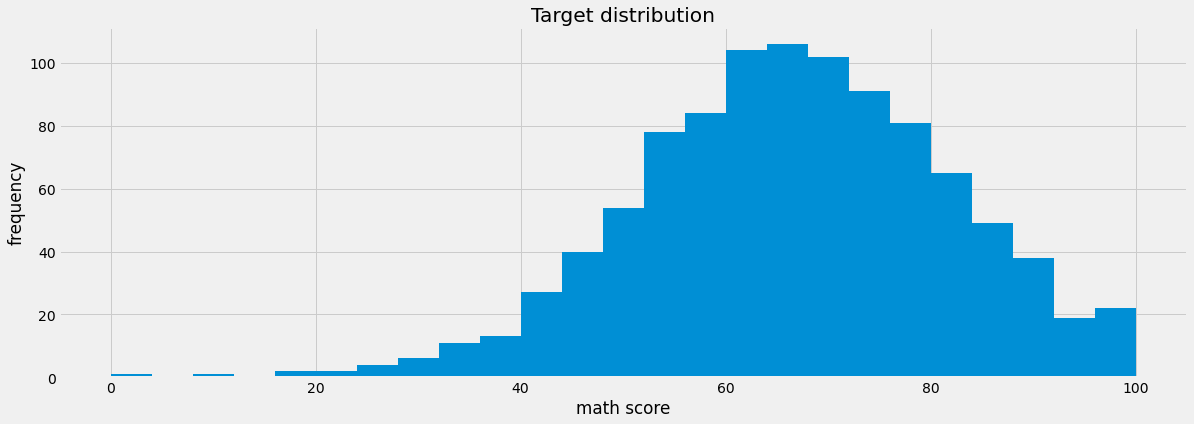

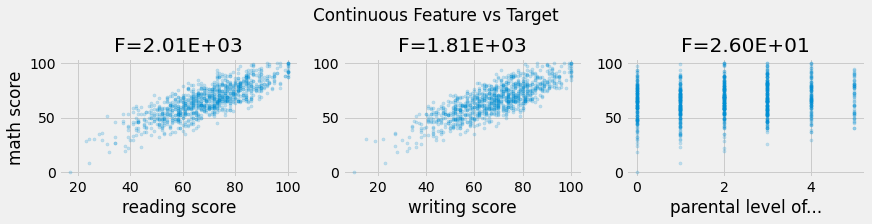

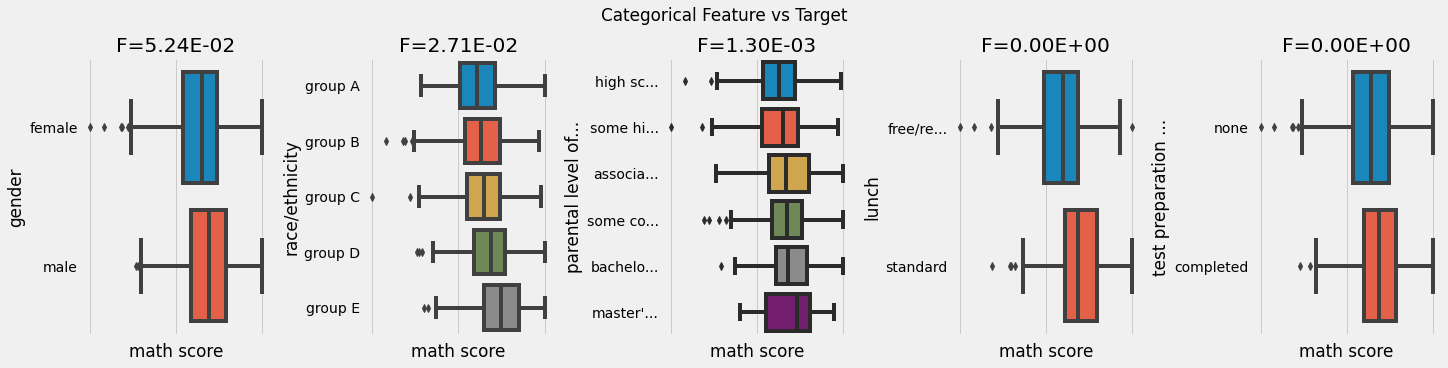

In [18]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'math score')

Target looks like regression


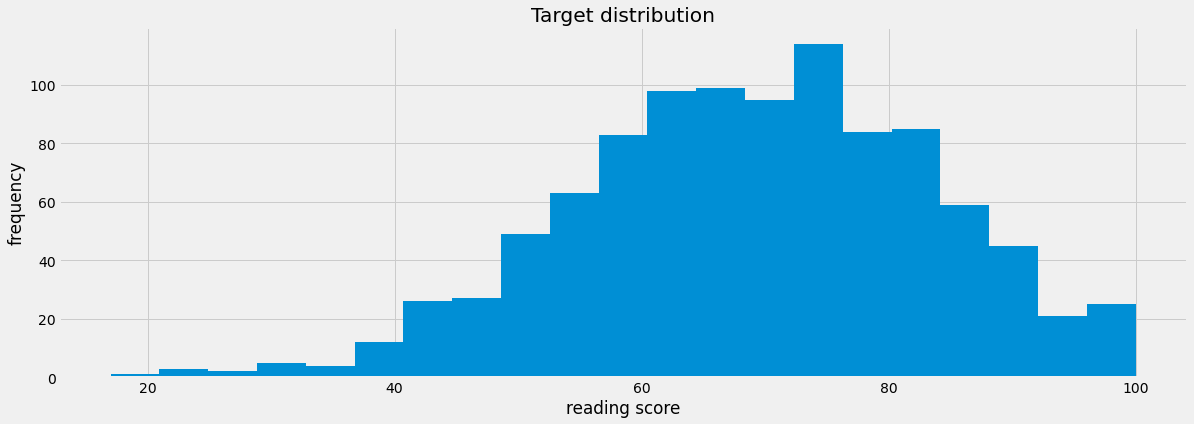

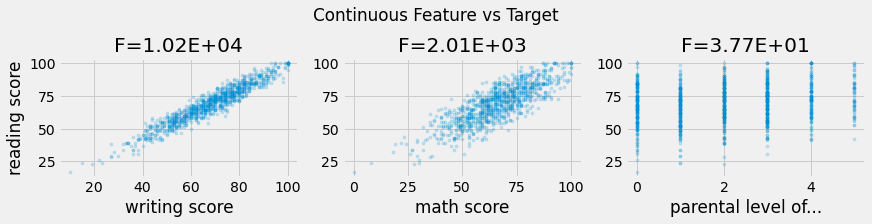

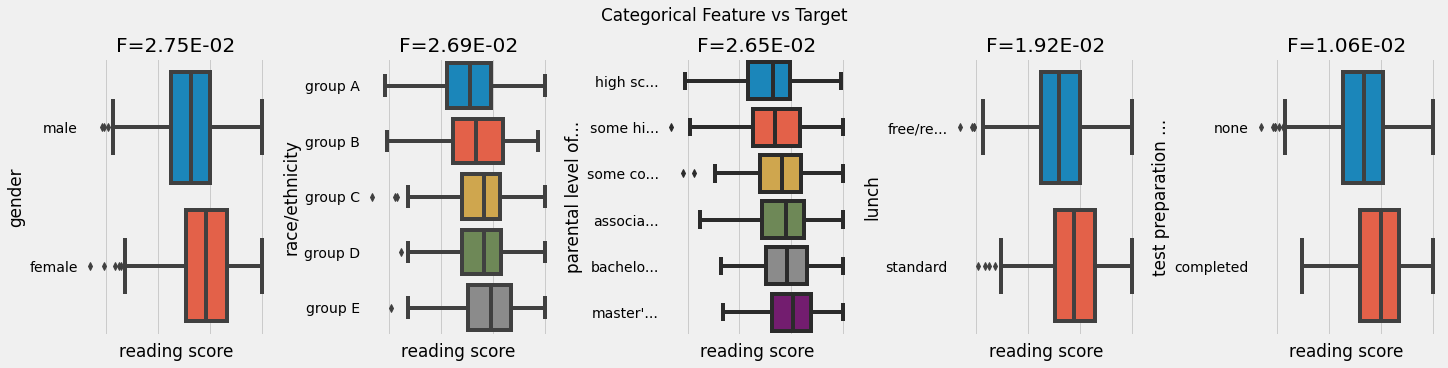

In [19]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'reading score')

Target looks like regression


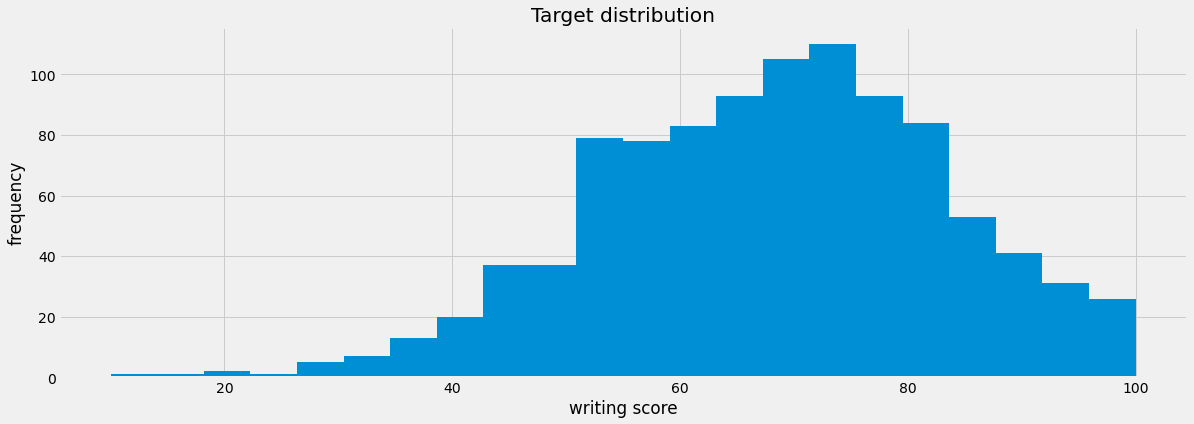

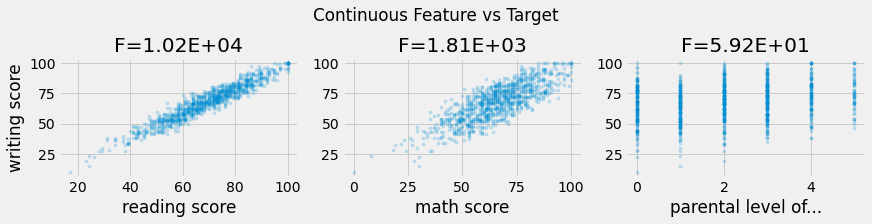

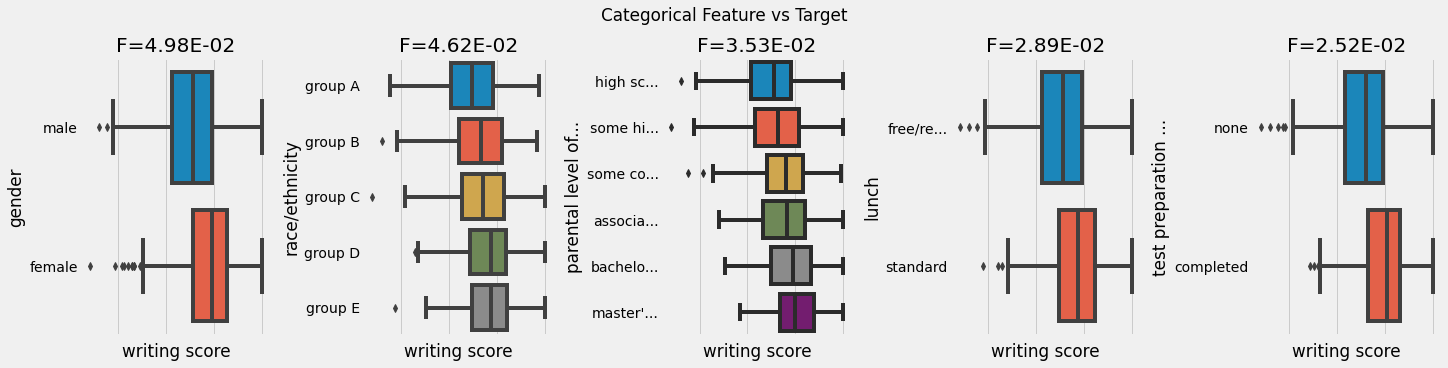

In [20]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'writing score')

In [21]:
print('__________________________Linear Regression______________________')

__________________________Linear Regression______________________


In [22]:
print('checking for linear relationships')

checking for linear relationships


<AxesSubplot:xlabel='reading score', ylabel='math score'>

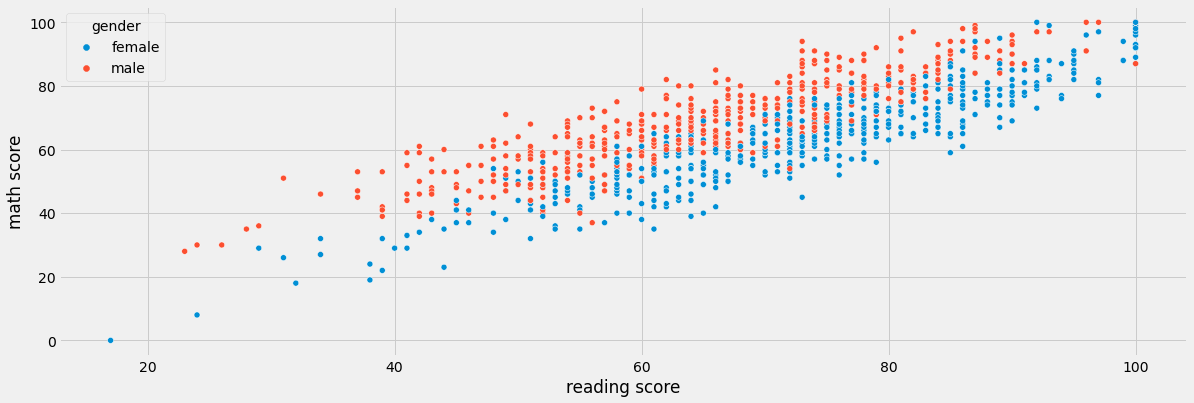

In [23]:
sns.scatterplot(df['reading score'], df['math score'], hue=df['gender'])

<AxesSubplot:xlabel='reading score', ylabel='math score'>

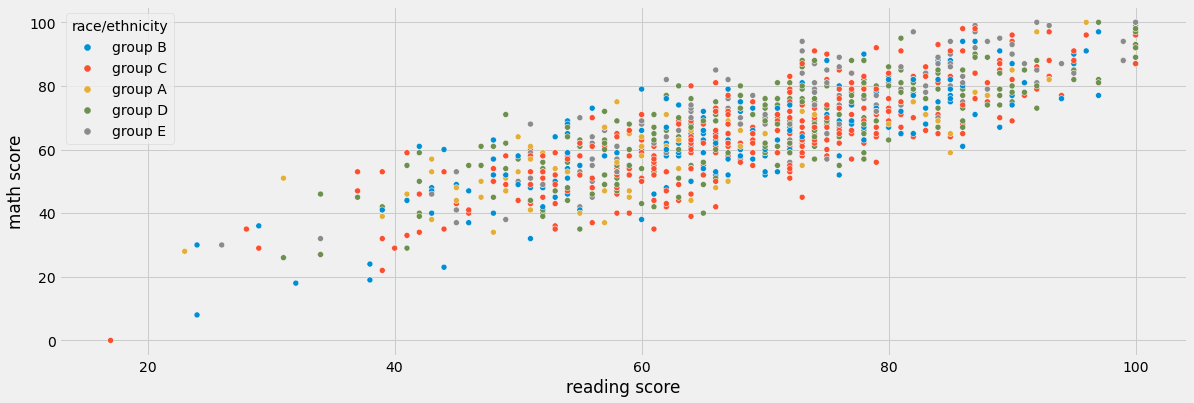

In [24]:
sns.scatterplot(df['reading score'], df['math score'], hue=df['race/ethnicity'])

<AxesSubplot:xlabel='reading score', ylabel='math score'>

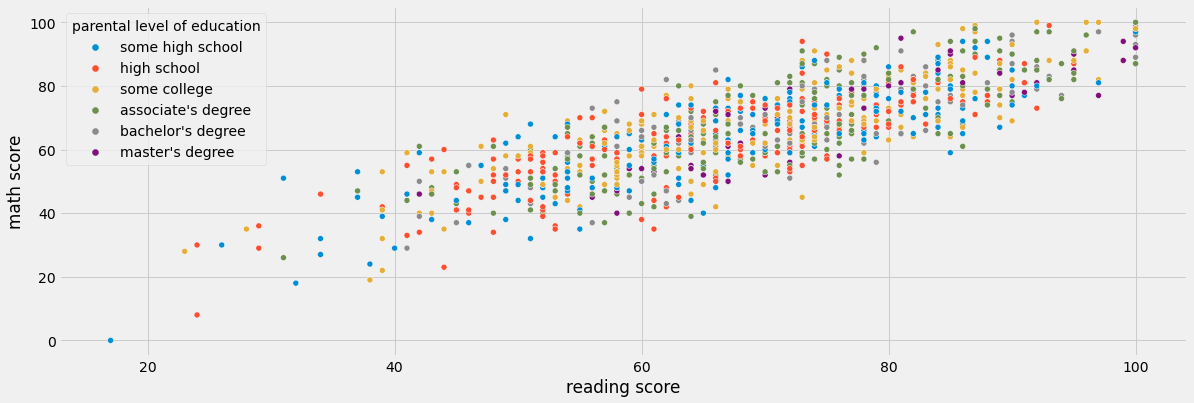

In [25]:
sns.scatterplot(df['reading score'], df['math score'], hue=df['parental level of education'])

<AxesSubplot:xlabel='reading score', ylabel='math score'>

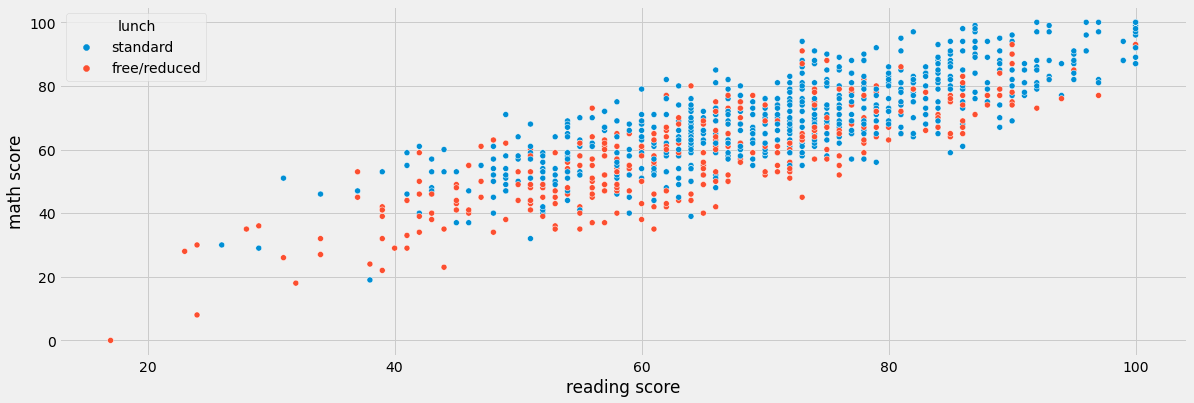

In [26]:
sns.scatterplot(df['reading score'], df['math score'], hue=df['lunch'])

<AxesSubplot:xlabel='reading score', ylabel='math score'>

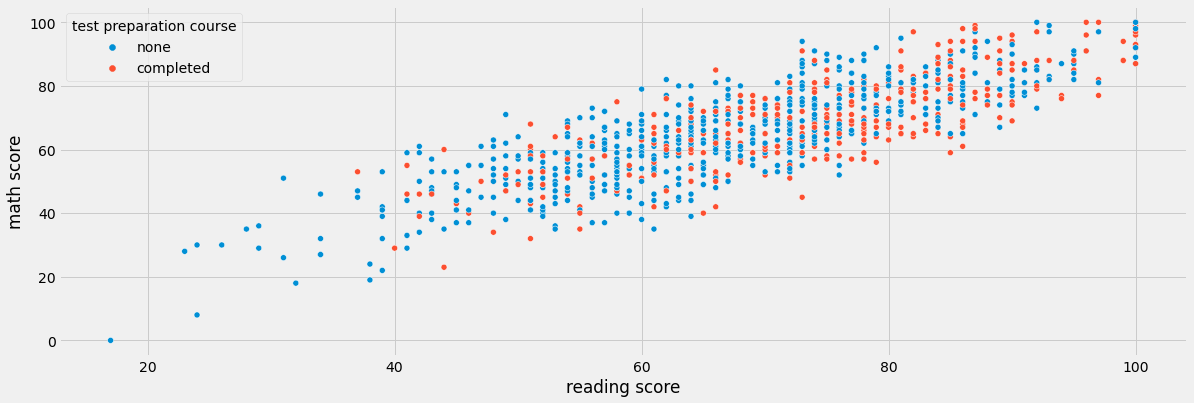

In [27]:
sns.scatterplot(df['reading score'], df['math score'], hue=df['test preparation course'])

In [28]:
df['gender'] = df['gender'].astype(pd.api.types.CategoricalDtype(
    categories=['male', 'female'], ordered=True))
df['gender-codes'] = df['gender'].cat.codes
df['race/ethnicity'] = df['race/ethnicity'].astype(pd.api.types.CategoricalDtype(
    categories=['group A', 'group B', 'group C', 'group D', 'group E'], ordered=True))
df['race/ethnicity-codes'] = df['race/ethnicity'].cat.codes
df['parental level of education'] = df['parental level of education'].astype(pd.api.types.CategoricalDtype(
    categories=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree",  
                "master's degree"], ordered=True))
df['parental level of education-codes'] = df['parental level of education'].cat.codes
df['lunch'] = df['lunch'].astype(pd.api.types.CategoricalDtype(
    categories=['standard', 'free/reduced'], ordered=True))
df['lunch-codes'] = df['lunch'].cat.codes
df['test preparation course'] = df['test preparation course'].astype(pd.api.types.CategoricalDtype(
    categories=['none', 'completed'], ordered=True))
df['test preparation course-codes'] = df['test preparation course'].cat.codes

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental level of education-codes,gender-codes,race/ethnicity-codes,lunch-codes,test preparation course-codes
0,female,group B,bachelor's degree,standard,none,72,72,74,4,1,1,0,0
1,female,group C,some college,standard,completed,69,90,88,2,1,2,0,1
2,female,group B,master's degree,standard,none,90,95,93,5,1,1,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,3,0,0,1,0
4,male,group C,some college,standard,none,76,78,75,2,0,2,0,0


In [41]:
X = df[['gender-codes', 'race/ethnicity-codes',
       'parental level of education-codes', 'lunch-codes',
       'test preparation course-codes']].astype(float)
Y_math = df['math score'].astype(float)
Y_reading = df['reading score'].astype(float)
Y_writing = df['writing score'].astype(float)

regr_math = linear_model.LinearRegression()
regr_math.fit(X,Y_math)

X = sm.add_constant(X)
model = sm.OLS(Y_math, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print("Printing Math Regression Results:")
print(print_model)

Print Math Regression Results
                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     64.89
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.11e-58
Time:                        11:39:46   Log-Likelihood:                -3996.1
No. Observations:                1000   AIC:                             8004.
Df Residuals:                     994   BIC:                             8034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [43]:
X = df[['gender-codes', 'race/ethnicity-codes',
       'parental level of education-codes', 'lunch-codes',
       'test preparation course-codes']].astype(float)
Y_math = df['math score'].astype(float)
Y_reading = df['reading score'].astype(float)
Y_writing = df['writing score'].astype(float)

regr_reading = linear_model.LinearRegression()
regr_reading.fit(X,Y_reading)

X = sm.add_constant(X)
model = sm.OLS(Y_reading, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print("Print Reading Regression Results:")
print(print_model)

Print Reading Regression Results
                            OLS Regression Results                            
Dep. Variable:          reading score   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     57.27
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.03e-52
Time:                        11:55:30   Log-Likelihood:                -3972.9
No. Observations:                1000   AIC:                             7958.
Df Residuals:                     994   BIC:                             7987.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [44]:
X = df[['gender-codes', 'race/ethnicity-codes',
       'parental level of education-codes', 'lunch-codes',
       'test preparation course-codes']].astype(float)
Y_math = df['math score'].astype(float)
Y_reading = df['reading score'].astype(float)
Y_writing = df['writing score'].astype(float)

regr_writing = linear_model.LinearRegression()
regr_writing.fit(X,Y_writing)

X = sm.add_constant(X)
model = sm.OLS(Y_writing, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print("Print Writing Regression Results:")
print(print_model)

Print Writing Regression Results
                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     96.05
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.30e-82
Time:                        11:57:07   Log-Likelihood:                -3942.4
No. Observations:                1000   AIC:                             7897.
Df Residuals:                     994   BIC:                             7926.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [30]:
X = df[['gender-codes', 'race/ethnicity-codes',
       'parental level of education-codes', 'lunch-codes',
       'test preparation course-codes']].astype(float)
Y_math = df['math score'].astype(float)
Y_reading = df['reading score'].astype(float)
Y_writing = df['writing score'].astype(float)

regr_math = linear_model.LinearRegression()
regr_math.fit(X,Y_math)

regr_reading = linear_model.LinearRegression()
regr_reading.fit(X,Y_reading)

regr_writing = linear_model.LinearRegression()
regr_writing.fit(X,Y_writing)

print('Math Intercept: \n', regr_math.intercept_)
print('Math Coefficients: \n', regr_math.coef_)
print('Coefficients order: Gender, Ethnicity, Parent Education, Lunch, Test Prep \n')

print('Reading Intercept: \n', regr_reading.intercept_)
print('Reading Coefficients: \n', regr_reading.coef_)
print('Coefficients order: Gender, Ethnicity, Parent Education, Lunch, Test Prep \n')

print('Writing Intercept: \n', regr_writing.intercept_)
print('Writing Coefficients: \n', regr_writing.coef_)
print('Coefficients order: Gender, Ethnicity, Parent Education, Lunch, Test Prep \n')

# GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 450, height = 400)
canvas1.pack()


#OPTIONS
gender_options = ['male', 'female']
ethnicity_options = ['group A', 'group B', 'group C', 'group D', 'group E']
par_edu_options = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
lunch_options = ['standard', 'free/reduced']
test_prep_options = ['none', 'completed']



# LABELS
title_label = tk.Label(root, text='Linear Regression Score Estimator ', font=("Arial", 18))
canvas1.create_window(200, 50, window=title_label)

gender_label = tk.Label(root, text='Gender: ')
canvas1.create_window(135, 100, window=gender_label)

ethnicity_label = tk.Label(root, text='Ethnicity: ')
canvas1.create_window(130, 120, window=ethnicity_label)

par_edu_label = tk.Label(root, text='Parental Education: ')
canvas1.create_window(100, 140, window=par_edu_label)

lunch_label = tk.Label(root, text='Lunch: ')
canvas1.create_window(140, 160, window=lunch_label)

test_prep_label = tk.Label(root, text='Test Prep: ')
canvas1.create_window(130, 180, window=test_prep_label)

gender_selection = StringVar()
ethnicity_selection = StringVar()
par_edu_selection = StringVar()
lunch_selection = StringVar()
test_prep_selection = StringVar()


# DROPDOWNS
gender_drop = tk.OptionMenu(root, gender_selection, *gender_options)
canvas1.create_window(270, 100, window=gender_drop)

ethnicity_drop = tk.OptionMenu(root, ethnicity_selection, *ethnicity_options)
canvas1.create_window(270, 120, window=ethnicity_drop)

par_edu_drop = tk.OptionMenu(root, par_edu_selection, *par_edu_options)
canvas1.create_window(270, 140, window=par_edu_drop)

lunch_drop = tk.OptionMenu(root, lunch_selection, *lunch_options)
canvas1.create_window(270, 160, window=lunch_drop)

test_prep_drop = tk.OptionMenu(root, test_prep_selection, *test_prep_options)
canvas1.create_window(270, 180, window=test_prep_drop)

global error_label
error_label=tk.Label(root, text='')
canvas1.create_window(260, 260, window=error_label)

def values():
    
    gs = gender_selection.get()
    es = ethnicity_selection.get()
    ps = par_edu_selection.get()
    ls = lunch_selection.get()
    ts = test_prep_selection.get()
    
    if (gs == "" or es == "" or ps == "" or ls == "" or ts == ""):
        error_label.config(text="All fields must be selected", bg='red')
        return

    error_label.destroy()
    if (gs == 'male'):
        gs = 0
    else:
        gs = 1
    
    if (es == 'group A'):
        es = 0
    elif(es == 'group B'):
        es = 1
    elif(es == 'group C'):
        es = 2
    elif(es == 'group D'):
        es = 3
    else:
        es = 4
    
    if (ps == 'some high school'):
        ps = 0
    elif(ps == 'high school'):
        ps = 1
    elif (ps == 'some college'):
        ps = 2
    elif(ps == "associate's degree"):
        ps = 3
    elif(ps == "bachelor's degree"):
        ps = 4
    else:
        ps = 5
        
    if (ls == 'standard'):
        ls = 0
    else:
        ls = 1
        
    if (ts == 'none'):
        ts = 0
    else: 
        ts = 1
          
    
    prediction_math = ('Math score prediction: ', regr_math.predict([[gs, es, ps, ls, ts]]))
    prediction_reading = ('Reading score prediction: ', regr_reading.predict([[gs, es, ps, ls, ts]]))
    prediction_writing = ('Writing score prediction: ', regr_writing.predict([[gs, es, ps, ls, ts]]))
    print('Math: ' + str(prediction_math) +'\n' + 'Reading: ' + str(prediction_reading) +'\n' + 'Writing: ' + str(prediction_writing) +'\n')
    
    math_label_prediction=tk.Label(root, text=prediction_math)
    canvas1.create_window(230, 280, window=math_label_prediction)
    
    reading_label_prediction=tk.Label(root, text=prediction_reading)
    canvas1.create_window(230, 300, window=reading_label_prediction)
    
    writing_label_prediction=tk.Label(root, text=prediction_writing)
    canvas1.create_window(230, 320, window=writing_label_prediction)
    
    

# Submit button
submit_button = tk.Button(root, text='Submit', command=values)
canvas1.create_window(270, 205, window=submit_button)

root.mainloop()


Math Intercept: 
 61.933868406999885
Math Coefficients: 
 [ -5.05763875   2.38747655   1.64690844 -10.94570935   5.7070525 ]
Coefficients order: Gender, Ethnicity, Parent Education, Lunch, Test Prep 

Reading Intercept: 
 58.617129732318276
Reading Coefficients: 
 [ 7.09523172  1.42001     1.76695704 -7.25280329  7.50599458]
Coefficients order: Gender, Ethnicity, Parent Education, Lunch, Test Prep 

Writing Intercept: 
 54.25847580968865
Writing Coefficients: 
 [ 9.08199241  1.66298038  2.28601244 -8.15071619 10.08951154]
Coefficients order: Gender, Ethnicity, Parent Education, Lunch, Test Prep 

